# Problem Statement:

**Introduction**

Understanding customer behavior is crucial for businesses aiming to enhance customer satisfaction, loyalty, and overall profitability. The retail industry is highly competitive, and gaining insights into customer preferences and behaviors can lead to more effective marketing strategies and product offerings. This analysis aims to explore various dimensions of customer behavior within a retail context, leveraging transactional and demographic data to identify trends and patterns.

**Objective**

The primary objective of this analysis is to investigate the purchasing behavior of customers based on key factors such as demographics, transaction history, and engagement with loyalty programs. By doing so, we aim to:

- Segment Customers: Classify customers into distinct segments based on their purchasing habits, frequency, and preferences. This segmentation will allow for targeted marketing strategies that resonate with specific groups.

- Identify Influencing Factors: Determine the key factors that influence customer purchasing decisions. These factors may include age, income bracket, loyalty program participation, and marketing engagement.

- Predict Future Behavior: Develop models to predict future purchasing behavior based on historical data, enabling proactive strategies to retain customers and enhance their shopping experiences.

**Usefulness of the Analysis**

- Targeted Marketing: By understanding customer segments and their preferences, businesses can create targeted marketing campaigns that address specific needs and desires, ultimately improving engagement and conversion rates.

- Customer Retention: Identifying factors that lead to customer churn allows businesses to implement retention strategies effectively, reducing turnover and increasing customer lifetime value.

- Inventory Management: Insights into purchasing patterns can inform inventory management decisions, ensuring that popular products are adequately stocked while minimizing excess inventory.

- Personalized Recommendations: Analyzing customer behavior can lead to the development of personalized product recommendations, enhancing the shopping experience and increasing sales.

# 1. Data Collection:

### 1.1 Data Collection
The dataset used in this analysis is sourced from Kaggle, specifically designed to simulate a large-scale retail environment with a comprehensive set of variables. It contains over a million rows and more than 100 columns, providing a rich variety of information related to customer demographics, transactional behavior, product details, promotions, and geographical aspects. This extensive dataset offers both regression and classification opportunities, focusing on predicting total sales and customer churn, respectively.

### 1.2 Data Acquisition
The dataset was collected with the intention of providing a realistic retail dataset for exploratory data analysis (EDA) and machine learning modeling. By combining customer information, transactional data, customer behavior metrics, and sales figures, the dataset replicates real-world retail scenarios, including the dynamics of sales performance, customer loyalty, and promotional effectiveness. The diversity of features allows for deep insights into both individual customer behaviors and overall retail performance trends.

### 1.3 Data Structure
The dataset contains key customer-related information such as age, gender, income bracket, and participation in loyalty programs. Transactional data includes specific details about the products purchased, quantities, discounts, and payment methods. Additionally, customer behavior metrics provide insight into purchasing patterns, average transaction values, and the use of promotions. The dataset also includes product-level information, such as brand, ratings, and return rates, as well as details on geographical and seasonal influences on purchasing behavior.

### 1.4 Source
This dataset is available on Kaggle and can be accessed [here](https://www.kaggle.com/datasets/utkalk/large-retail-data-set-for-eda). The large volume of data, combined with its diversity, makes it ideal for developing sophisticated predictive models in retail analytics.

# 2. Data Preprocessing

### 2.1 Handling the missing values

Missing values are a common challenge in data science and occur when certain observations or features in a dataset are incomplete, unrecorded, or unavailable. These gaps in data can arise from various sources, such as human error during data entry, limitations in data collection tools, privacy restrictions, or data corruption. Handling missing values effectively is critical because their presence can bias the analysis, reduce model accuracy, and lead to incorrect conclusions if not addressed properly.


In [1]:
# importing the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [23]:
# Reading the data
retail_data = pd.read_csv('retail_data.csv')
retail_data.head()

,customer_id,age,gender,income_bracket,loyalty_program,membership_years,churned,marital_status,number_of_children,education_level,occupation,transaction_id,transaction_date,product_id,product_category,quantity,unit_price,discount_applied,payment_method,store_location,transaction_hour,day_of_week,week_of_year,month_of_year,avg_purchase_value,purchase_frequency,last_purchase_date,avg_discount_used,preferred_store,online_purchases,in_store_purchases,avg_items_per_transaction,avg_transaction_value,total_returned_items,total_returned_value,total_sales,total_transactions,total_items_purchased,total_discounts_received,avg_spent_per_category,max_single_purchase_value,min_single_purchase_value,product_name,product_brand,product_rating,product_review_count,product_stock,product_return_rate,product_size,product_weight,product_color,product_material,product_manufacture_date,product_expiry_date,product_shelf_life,promotion_id,promotion_type,promotion_start_date,promotion_end_date,promotion_effectiveness,promotion_channel,promotion_target_audience,customer_zip_code,customer_city,customer_state,store_zip_code,store_city,store_state,distance_to_store,holiday_season,season,weekend,customer_support_calls,email_subscriptions,app_usage,website_visits,social_media_engagement,days_since_last_purchase
0,1,56,Other,High,No,0,No,Divorced,3,Bachelor's,Self-Employed,503290,2020-10-11 10:08:52,1480,Electronics,8,49.72,0.50,Credit Card,Location A,18,Wednesday,27,7,411.13,Weekly,2021-09-11 04:22:38,0.02,Location A,55,86,8.64,171.83,0,750.40,563.16,69,367,415.01,114.28,679.25,0.28,Product D,Brand Y,2.5,560,48,0.40,Small,4.61,Red,Metal,2019-08-04 01:47:01,2022-05-28 14:54:02,250,271,20% Off,2021-07-14 14:28:42,2022-12-30 13:04:13,High,Online,New Customers,37848,City D,State Y,88500,City D,State Y,33.21,No,Spring,Yes,5,No,High,30,High,40
1,2,69,Female,Medium,No,2,No,Married,2,PhD,Unemployed,347796,2021-12-08 01:07:40,1597,Groceries,7,817.76,0.32,Credit Card,Location C,15,Friday,20,2,268.71,Daily,2021-05-16 12:01:16,0.33,Location C,48,2,9.60,20.18,4,551.60,7554.57,8,475,801.79,305.95,491.56,4.65,Product C,Brand X,4.7,413,80,0.30,Medium,0.84,Blue,Metal,2019-10-23 19:59:17,2022-12-19 08:04:41,180,631,Flash Sale,2021-09-23 04:26:09,2022-09-13 03:16:26,Low,Social Media,New Customers,44896,City A,State X,30046,City C,State X,62.56,No,Summer,Yes,6,No,High,40,Medium,338
2,3,46,Female,Low,No,5,No,Married,3,Bachelor's,Self-Employed,493688,2020-02-17 09:40:48,5142,Toys,8,270.30,0.35,Debit Card,Location A,9,Saturday,35,6,246.79,Weekly,2021-02-07 16:47:48,0.47,Location B,16,45,1.55,55.17,0,629.19,7564.14,73,138,264.31,426.70,938.26,7.30,Product B,Brand X,4.6,312,14,0.08,Medium,0.23,Green,Plastic,2018-05-12 08:00:29,2023-02-01 12:15:07,131,879,Flash Sale,2021-06-13 12:31:15,2022-03-13 00:53:35,Low,Online,New Customers,11816,City B,State X,26169,City A,State Y,83.04,Yes,Winter,Yes,2,Yes,Low,89,Medium,61
3,4,32,Female,Low,No,0,No,Divorced,2,Master's,Employed,861348,2020-08-13 00:43:14,8447,Toys,2,547.84,0.10,Credit Card,Location A,13,Friday,42,8,178.92,Weekly,2021-12-30 23:48:26,0.41,Location B,50,47,1.78,15.79,3,346.67,8125.92,20,158,192.93,689.58,644.31,7.31,Product A,Brand Z,1.1,110,69,0.09,Large,4.37,Blue,Wood,2019-11-15 16:17:29,2023-02-05 11:46:57,16,211,Buy One Get One Free,2021-05-23 05:42:48,2022-02-06 00:42:30,High,Social Media,Returning Customers,78604,City A,State Y,22667,City B,State Z,50.43,Yes,Winter,No,12,No,Low,12,Low,42
4,5,60,Female,Low,Yes,7,Yes,Divorced,2,Bachelor's,Employed,535835,2021-07-02 11:59:03,6025,Clothing,4,785.29,0.17,Mobile Payment,Location C,17,Monday,37,3,214.06,Yearly,2021-11-02 11:48:25,0.22,Location B,48,42,9.38,240.03,2,979.91,114.32,83,263,497.26,715.86,162.86,1.92,Product C,Brand X,3.8,172,25,0.39,Small,1.68,Red,Metal,2019-08-27 02:58:19,2023-10-05 08:13:07,57,862,Flash Sale,2021-04-19 04:55:32,2022-12-04 13:07:09,Medium,Online,New Customers,17760,City B,State Z,87843,City C,State X,36.55,Yes,Summer,Yes,3,No,Medium,31,Low,242


In [ ]:
# Check original values in 'purchase_frequency'
print(retail_data['purchase_frequency'].head(10))

In [7]:
# Descriptive Statistics
retail_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 78 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   customer_id                1000000 non-null  int64  
 1   age                        1000000 non-null  int64  
 2   gender                     1000000 non-null  object 
 3   income_bracket             1000000 non-null  object 
 4   loyalty_program            1000000 non-null  object 
 5   membership_years           1000000 non-null  int64  
 6   churned                    1000000 non-null  object 
 7   marital_status             1000000 non-null  object 
 8   number_of_children         1000000 non-null  int64  
 9   education_level            1000000 non-null  object 
 10  occupation                 1000000 non-null  object 
 11  transaction_id             1000000 non-null  int64  
 12  transaction_date           1000000 non-null  object 
 13  product_id   

In [8]:
retail_data.describe()

,customer_id,age,membership_years,number_of_children,transaction_id,product_id,quantity,unit_price,discount_applied,transaction_hour,...,product_return_rate,product_weight,product_shelf_life,promotion_id,customer_zip_code,store_zip_code,distance_to_store,customer_support_calls,website_visits,days_since_last_purchase
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,...,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000
mean,500000.500000,48.496605,4.497453,2.000554,499891.731447,4999.564515,5.002649,500.261317,0.249910,11.505193,...,0.250137,5.054372,181.876207,499.920037,54993.644773,54972.766714,49.979109,9.496269,49.512951,182.027559
std,288675.278933,17.874381,2.872406,1.414214,288706.057652,2886.798391,2.583751,288.462860,0.144328,6.924460,...,0.144408,2.857848,105.228855,288.453056,25975.807799,25981.483139,28.860989,5.761233,28.869777,105.364598
min,1.000000,18.000000,0.000000,0.000000,2.000000,1.000000,1.000000,1.000000,0.000000,0.000000,...,0.000000,0.100000,0.000000,1.000000,10000.000000,10000.000000,0.000000,0.000000,0.000000,0.000000
25%,250000.750000,33.000000,2.000000,1.000000,249878.750000,2498.000000,3.000000,250.310000,0.130000,5.000000,...,0.130000,2.580000,91.000000,250.000000,32477.750000,32473.000000,24.970000,4.000000,25.000000,91.000000
50%,500000.500000,49.000000,4.000000,2.000000,499559.500000,4999.000000,5.000000,500.410000,0.250000,12.000000,...,0.250000,5.060000,182.000000,500.000000,54966.000000,54961.000000,49.960000,9.000000,50.000000,182.000000
75%,750000.250000,64.000000,7.000000,3.000000,750071.250000,7498.000000,7.000000,750.160000,0.370000,18.000000,...,0.380000,7.530000,273.000000,750.000000,77493.000000,77451.000000,74.950000,14.000000,75.000000,273.000000
max,1000000.000000,79.000000,9.000000,4.000000,999999.000000,9999.000000,9.000000,1000.000000,0.500000,23.000000,...,0.500000,10.000000,364.000000,999.000000,99998.000000,99998.000000,100.000000,19.000000,99.000000,364.000000


In [14]:
# Checking for missing values
missing_values = retail_data.isnull().sum().to_frame(name='missing_count')
missing_values

,missing_count
customer_id,0
age,0
gender,0
income_bracket,0
loyalty_program,0
...,...
email_subscriptions,0
app_usage,0
website_visits,0
social_media_engagement,0


In the preliminary analysis of the dataset, it was found that there are no missing values across all columns. This means that every record and feature in the dataset is fully populated, with no gaps or unrecorded observations. The completeness of the data is a significant advantage, as it ensures that all aspects of the dataset can be analyzed without the need for additional data cleaning steps often required for handling missing values.

The absence of missing values offers several benefits:

Data Integrity: The dataset maintains its full integrity, enabling a more accurate and comprehensive analysis of all variables.
Simplified Analysis Process: Since there are no missing values, we can directly proceed with descriptive statistics, visualizations, and other analytical methods without needing to deal with imputation or data exclusion.
Better Insights: Complete data ensures that all features can contribute to the analysis, allowing for a more holistic view of trends, patterns, and correlations within the dataset.
This sets a strong foundation for in-depth exploratory data analysis (EDA) and insights generation, as we can focus directly on understanding the relationships within the data, such as customer behavior, sales trends, and churn rates, without the concern of missing data skewing the results.



## 2.2 Outliers

The Interquartile Range (IQR) is a simple statistical technique used to identify outliers in a dataset. It focuses on the middle 50% of the data by calculating the first quartile (Q1) and the third quartile (Q3).

1. Calculate Q1 and Q3:

- Q1 is the value below which 25% of the data falls, while Q3 is the value below which 75% of the data falls.
Determine the IQR:

2. IQR is calculated as:
- $ R=Q3−Q1 $
3. Identify Outliers:

- Outliers are defined as values that fall below $  𝑄1−1.5*IQR $ or $  𝑄3+1.5*IQR $

In [15]:
# Function to detect outliers using IQR
def detect_outliers_iqr(df):
    outlier_indices = []
    
    for column in df.select_dtypes(include=['float64', 'int64']):  # Select only numeric columns
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Find outlier indices
        outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)].index
        outlier_indices.extend(outliers)
        
    return list(set(outlier_indices))  # Return unique indices

# Detect outliers in the retail_data DataFrame
outlier_indices = detect_outliers_iqr(retail_data)

# Print the rows identified as outliers
print("Outliers detected across all numeric columns:")
print(retail_data.loc[outlier_indices])


Outliers detected across all numeric columns:
Empty DataFrame
Columns: [customer_id, age, gender, income_bracket, loyalty_program, membership_years, churned, marital_status, number_of_children, education_level, occupation, transaction_id, transaction_date, product_id, product_category, quantity, unit_price, discount_applied, payment_method, store_location, transaction_hour, day_of_week, week_of_year, month_of_year, avg_purchase_value, purchase_frequency, last_purchase_date, avg_discount_used, preferred_store, online_purchases, in_store_purchases, avg_items_per_transaction, avg_transaction_value, total_returned_items, total_returned_value, total_sales, total_transactions, total_items_purchased, total_discounts_received, avg_spent_per_category, max_single_purchase_value, min_single_purchase_value, product_name, product_brand, product_rating, product_review_count, product_stock, product_return_rate, product_size, product_weight, product_color, product_material, product_manufacture_date, p

In this analysis of the retail dataset, I utilized the Interquartile Range (IQR) method to identify potential outliers across all numeric columns. The results of this analysis revealed that no outliers were detected within the dataset.

This absence of outliers indicates that the numerical features maintain a consistent range of values without extreme variations, which can often skew data analysis and impact subsequent modeling efforts. The stability of the dataset enhances the reliability of insights derived from it, allowing us to focus on exploring the relationships between different features and their effects on sales and customer churn without the complicating influence of outliers.

The finding of no outliers is particularly advantageous in a retail context, as it reflects uniformity in customer behavior, transaction values, and product performance metrics. Moving forward, the analysis can be proceeded confidently, knowing that this dataset is free from extreme values that could distort our findings.

## 2.3 Feature Engineering


In [ ]:
# Customer Lifetime Value CLV=(AveragePurchaseValue)×(PurchaseFrequency)×(CustomerLifespan)
# Customer Engagement Metrics based on number of emails opened, app usage frequency, and website visit durations.
# Product Affinity Score: Measure the likelihood of customers purchasing specific products based on their transaction history.
# Customer Segment

1. Customer Lifetime Value (CLV):


In [28]:
# Calculate Customer Lifespan (difference in days between first and last purchase)
# Convert transaction_date to datetime format
retail_data['transaction_date'] = pd.to_datetime(retail_data['transaction_date'])

# Group by customer and find the earliest transaction date
retail_data['first_purchase_date'] = retail_data.groupby('customer_id')['transaction_date'].transform('min')
# Last purchase date
retail_data['last_purchase_date'] = pd.to_datetime(retail_data['last_purchase_date'])
# Calculate Customer Lifespan
retail_data['customer_lifespan'] = (retail_data['last_purchase_date'] - retail_data['first_purchase_date']).dt.days

frequency_mapping = {
    'Daily': 365,
    'Weekly': 52,
    'Monthly': 12,
    'Yearly': 1
}

# Apply mapping to create a numeric purchase frequency column
retail_data['purchase_frequency_numeric'] = retail_data['purchase_frequency'].map(frequency_mapping)

# Assuming you have already calculated 'customer_lifespan' and 'avg_purchase_value'
retail_data['customer_lifespan'] = 3  # Example value; replace with your actual logic
retail_data['CLV'] = (retail_data['avg_purchase_value'] *
                      retail_data['purchase_frequency_numeric'] *
                      retail_data['customer_lifespan'])

# Display the result
print(retail_data[['avg_purchase_value', 'purchase_frequency', 'customer_lifespan', 'CLV']])


        avg_purchase_value purchase_frequency  customer_lifespan        CLV
0                   411.13             Weekly                  3   64136.28
1                   268.71              Daily                  3  294237.45
2                   246.79             Weekly                  3   38499.24
3                   178.92             Weekly                  3   27911.52
4                   214.06             Yearly                  3     642.18
...                    ...                ...                ...        ...
999995              415.94             Weekly                  3   64886.64
999996              390.48             Weekly                  3   60914.88
999997              301.80              Daily                  3  330471.00
999998              261.88             Yearly                  3     785.64
999999              128.37             Yearly                  3     385.11

[1000000 rows x 4 columns]


2. Customer Engagement Metrics

In [26]:
print(retail_data[['email_subscriptions','app_usage','website_visits','social_media_engagement','days_since_last_purchase']])

       email_subscriptions app_usage  website_visits social_media_engagement  \
0                       No      High              30                    High   
1                       No      High              40                  Medium   
2                      Yes       Low              89                  Medium   
3                       No       Low              12                     Low   
4                       No    Medium              31                     Low   
...                    ...       ...             ...                     ...   
999995                 Yes       Low              75                    High   
999996                  No       Low              60                     Low   
999997                  No      High              14                  Medium   
999998                 Yes    Medium              87                    High   
999999                  No      High              82                  Medium   

        days_since_last_purchase  
0   

In [29]:
# Step 1: Map email subscriptions to a numerical value
retail_data['email_subscriptions_score'] = retail_data['email_subscriptions'].map({'Yes': 1, 'No': 0})

# Step 2: Convert app usage and social media engagement to numerical scores
engagement_mapping = {
    'High': 1,
    'Medium': 0.5,
    'Low': 0
}
retail_data['app_usage_score'] = retail_data['app_usage'].map(engagement_mapping)
retail_data['social_media_engagement_score'] = retail_data['social_media_engagement'].map(engagement_mapping)

# Handle NaN values (if any, based on your strategy)
retail_data['app_usage_score'].fillna(0, inplace=True)
retail_data['social_media_engagement_score'].fillna(0, inplace=True)

# Step 3: Calculate customer engagement score
retail_data['customer_engagement_score'] = (
    retail_data['email_subscriptions_score'] + 
    retail_data['app_usage_score'] + 
    retail_data['website_visits'] + 
    retail_data['social_media_engagement_score'] - 
    (retail_data['days_since_last_purchase'] / 30)  # Penalizing for more days since last purchase
)

# Optional: Normalize the engagement score if desired
max_possible_score = (
    1 +  # Max score for email subscriptions (1 for 'Yes')
    1 +  # Max score for app usage (1 for 'High')
    retail_data['website_visits'].max() +  # Max website visits
    1  # Max score for social media engagement (1 for 'High')
)

retail_data['normalized_engagement_score'] = retail_data['customer_engagement_score'] / max_possible_score

# Display the updated DataFrame with engagement scores
print(retail_data[['email_subscriptions', 'app_usage', 'website_visits', 
                   'social_media_engagement', 'days_since_last_purchase', 
                   'customer_engagement_score', 'normalized_engagement_score']].head())



  email_subscriptions app_usage  website_visits social_media_engagement  \
0                  No      High              30                    High   
1                  No      High              40                  Medium   
2                 Yes       Low              89                  Medium   
3                  No       Low              12                     Low   
4                  No    Medium              31                     Low   

   days_since_last_purchase  customer_engagement_score  \
0                        40                  30.666667   
1                       338                  30.233333   
2                        61                  88.466667   
3                        42                  10.600000   
4                       242                  23.433333   

   normalized_engagement_score  
0                     0.300654  
1                     0.296405  
2                     0.867320  
3                     0.103922  
4                     0.229739  


# 3. EDA


## 3.1 Univariate Analysis
- Key Outcomes


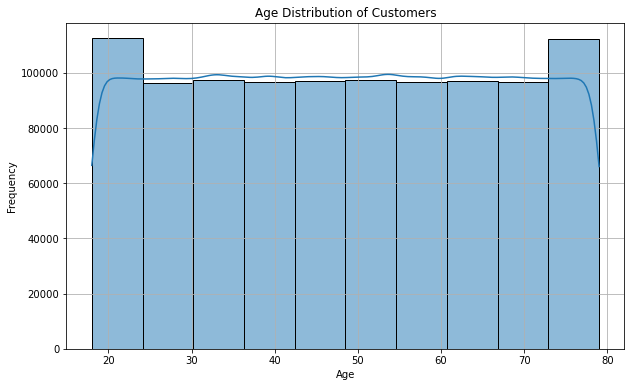

In [41]:
# Age Distribution
plt.figure(figsize=(10, 6))
sns.histplot(retail_data['age'], bins=10, kde=True)
plt.title('Age Distribution of Customers')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid()
plt.show()

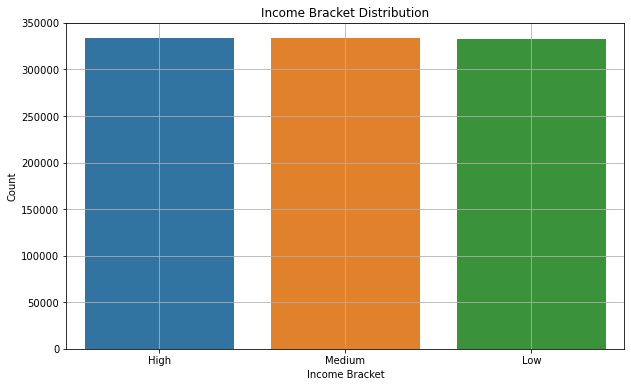

In [43]:
# Income Bracket Distribution
plt.figure(figsize=(10, 6))
sns.countplot(x='income_bracket', data=retail_data)
plt.title('Income Bracket Distribution')
plt.xlabel('Income Bracket')
plt.ylabel('Count')
plt.grid()
plt.show()

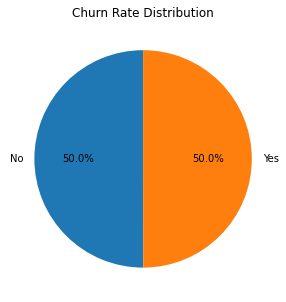

In [44]:

# Churn Rate
churn_rate = retail_data['churned'].value_counts(normalize=True) * 100
plt.figure(figsize=(8, 5))
churn_rate.plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title('Churn Rate Distribution')
plt.ylabel('')
plt.show()


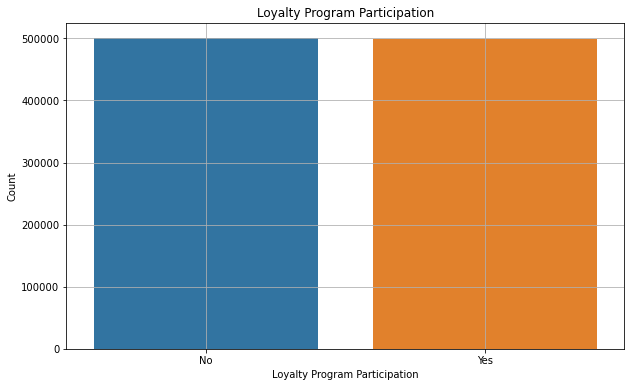

In [45]:

# Loyalty Program Participation
plt.figure(figsize=(10, 6))
sns.countplot(x='loyalty_program', data=retail_data)
plt.title('Loyalty Program Participation')
plt.xlabel('Loyalty Program Participation')
plt.ylabel('Count')
plt.grid()
plt.show()


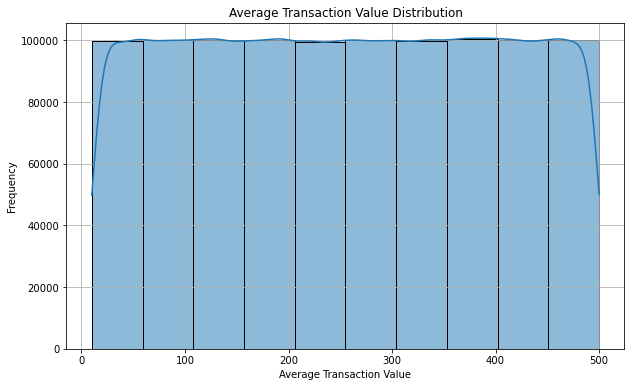

In [47]:
# Average Purchase Value Distribution
plt.figure(figsize=(10, 6))
sns.histplot(retail_data['avg_transaction_value'], bins=10, kde=True)
plt.title('Average Transaction Value Distribution')
plt.xlabel('Average Transaction Value')
plt.ylabel('Frequency')
plt.grid()
plt.show()

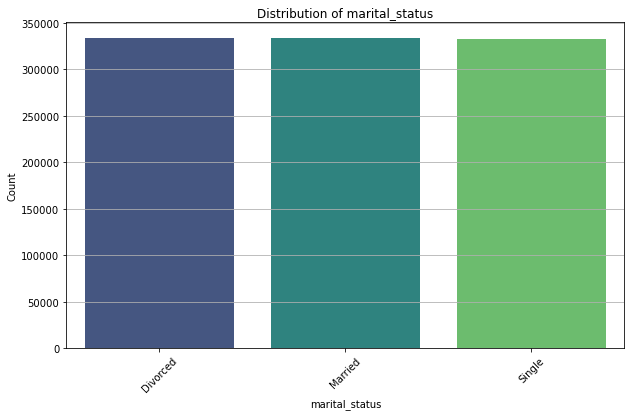

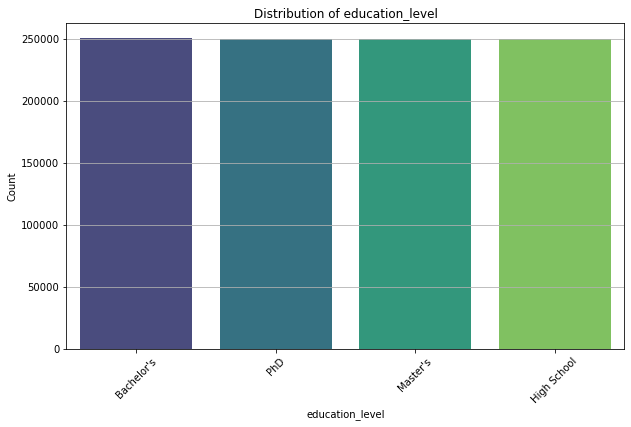

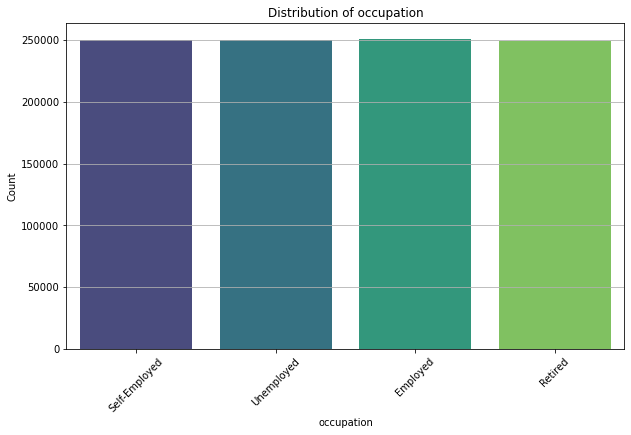

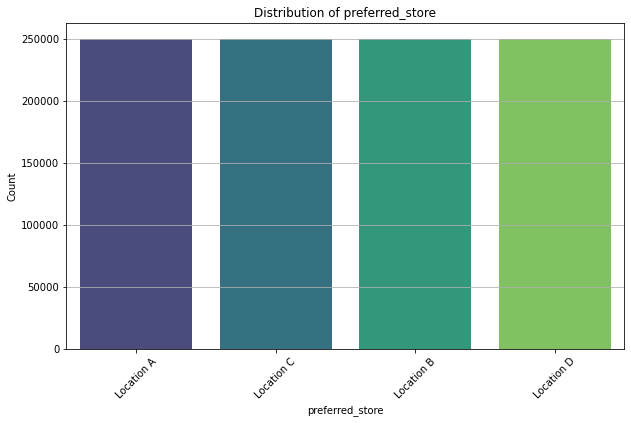

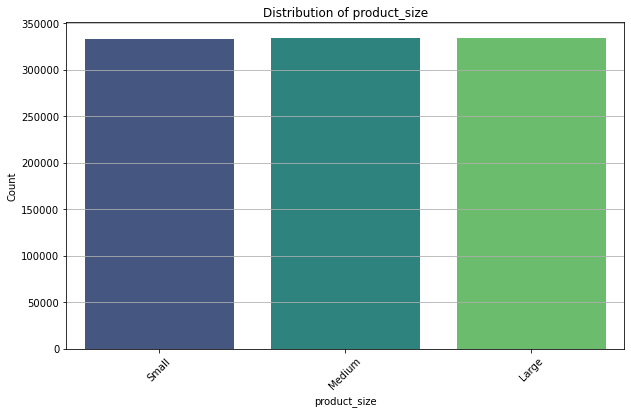

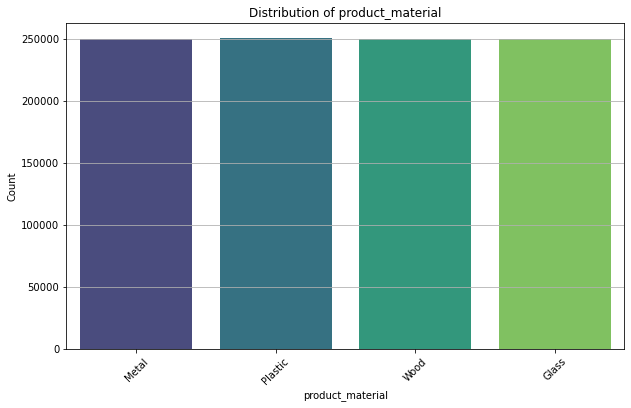

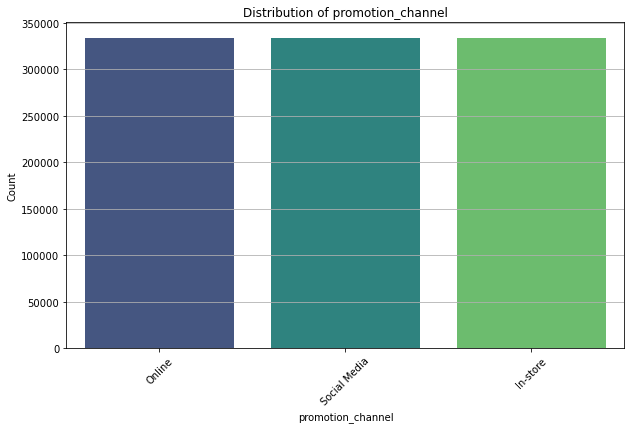

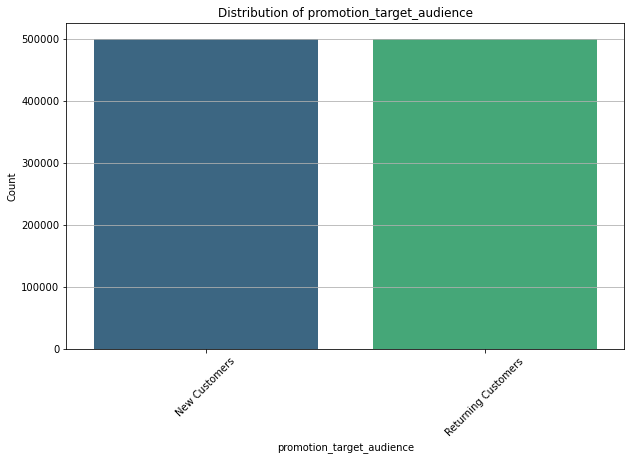

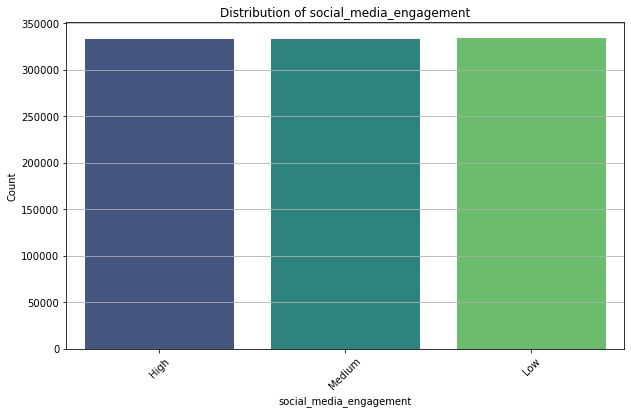

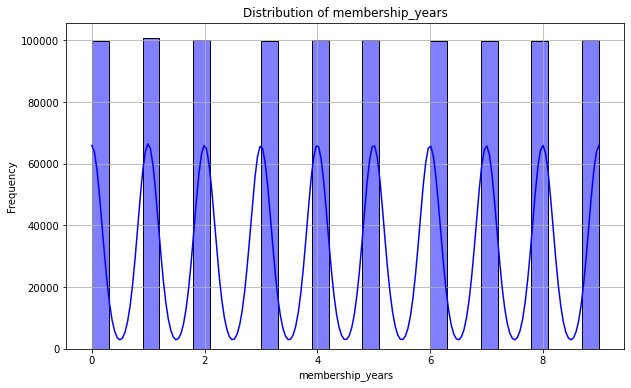

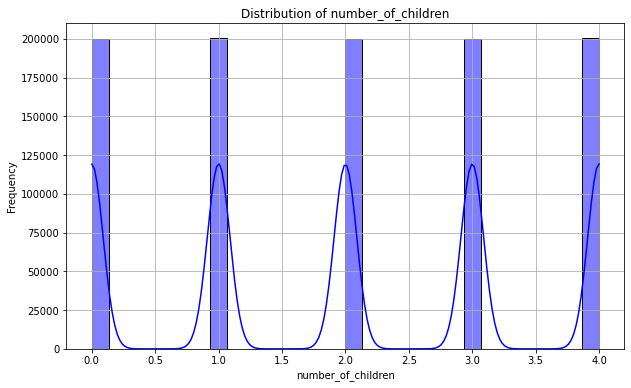

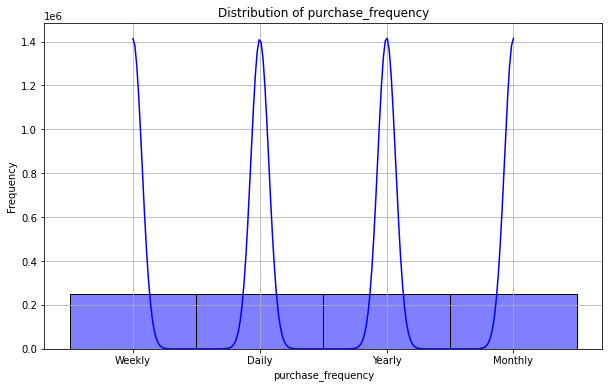

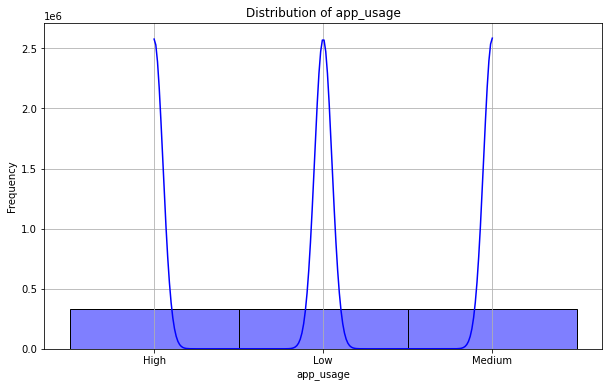

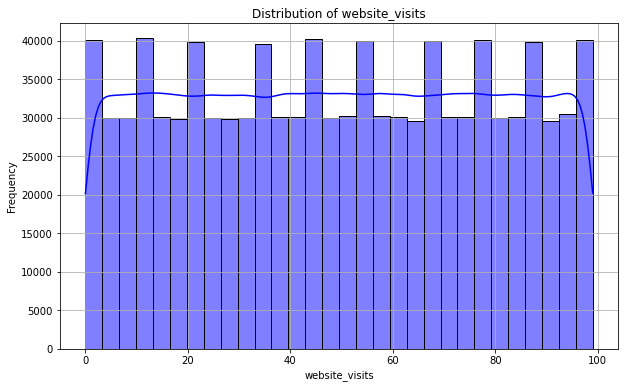

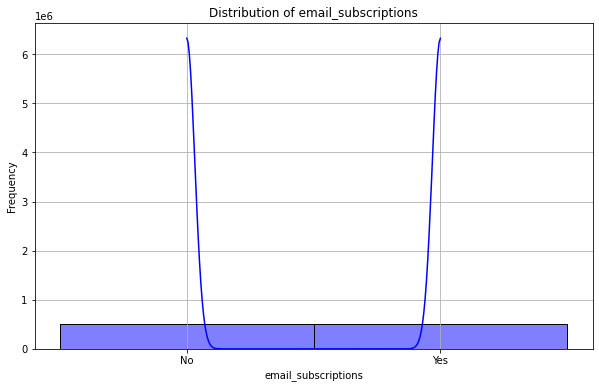

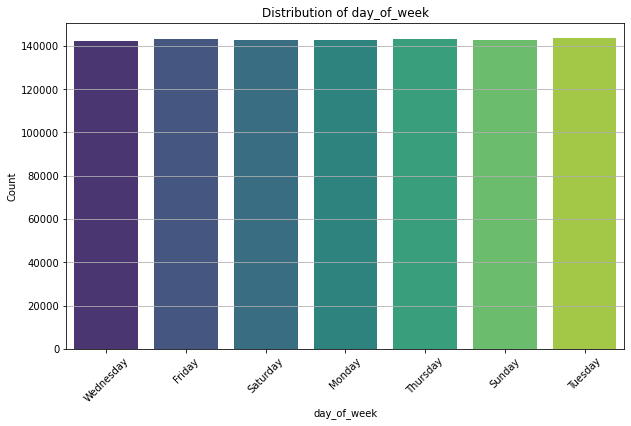

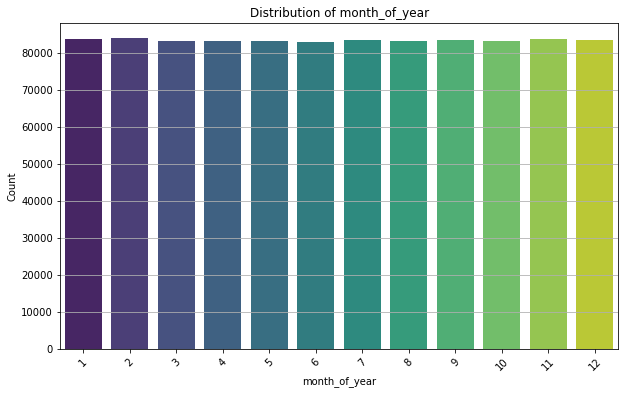

In [57]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load your retail data (ensure you have your dataset loaded into a DataFrame)
# retail_data = pd.read_csv('path_to_your_retail_data.csv')

# Define the columns to analyze
categorical_columns = [
    'marital_status', 'education_level', 'occupation', 'preferred_store',
    'product_size', 'product_material', 'promotion_channel',
    'promotion_target_audience', 'social_media_engagement'
]
numerical_columns = [
    'membership_years', 'number_of_children', 'purchase_frequency', 
    'app_usage', 'website_visits', 'email_subscriptions'
]
date_columns = ['day_of_week', 'month_of_year']

# Univariate Analysis for Categorical Variables
def categorical_analysis(data, column):
    plt.figure(figsize=(10, 6))
    sns.countplot(x=column, data=data, palette='viridis')
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.grid(axis='y')
    plt.show()

# Univariate Analysis for Numerical Variables
def numerical_analysis(data, column):
    plt.figure(figsize=(10, 6))
    sns.histplot(data[column], bins=30, kde=True, color='blue')
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.grid()
    plt.show()

# Performing the analysis
for col in categorical_columns:
    categorical_analysis(retail_data, col)

for col in numerical_columns:
    numerical_analysis(retail_data, col)

# Analyzing date-related variables
for col in date_columns:
    categorical_analysis(retail_data, col)


### 3.1.1 Key Outcomes of Univariate Analysis
### Key Outcomes from Univariate Analysis:

1. **Age Distribution**: Customers aged **20-25** and **75-80** are more frequent compared to other age groups, indicating two distinct customer age demographics.
   
2. **Income Brackets**: The distribution across **income brackets** is relatively balanced, showing that customers from various income levels are equally represented.

3. **Churn Rate**: The **churn rate** distribution is close to **50-50**, suggesting that half of the customers tend to churn while the other half remain loyal.

4. **Loyalty Program Participation**: The proportion of customers enrolled in the **loyalty program** is equally distributed, showing no significant bias in membership uptake.

5. **Education Level**: There is an **equal proportion** of customers across different **education levels**, indicating that the customer base is diverse in terms of educational backgrounds.

6. **Marital Status**: The **marital status** of customers is evenly distributed, showing no skew toward single or married customers.

7. **Occupation**: The analysis shows **equal proportions** of customers across different **occupations**, suggesting no dominance of any specific job role in the customer base.

8. **Preferred Store**: There is an **equal preference** across the available store options, with no specific store being favored more than others.

9. **Product Size**: All **product sizes** show an equal distribution, indicating that customers purchase a variety of sizes consistently.

10. **Product Material**: The distribution of **product materials** is balanced, reflecting equal customer interest across different product materials.

11. **Promotion Channel**: There is no significant preference for a particular **promotion channel**, with all channels receiving similar attention from customers.

12. **Promotion Target Audience**: The **target audiences** for promotions show an equal distribution, suggesting promotions are evenly aimed at various customer segments.

13. **Social Media Engagement**: Customers engage with social media equally, showing no bias towards or against any particular level of engagement.

14. **Membership Years**: Customers who have been members for **0-10 years** are evenly distributed, reflecting steady customer retention over the years.

15. **Number of Children**: There is an **equal distribution** among customers with varying numbers of children.

16. **App Usage**: **App usage** levels (low, medium, high) are **equally distributed**, indicating consistent engagement with the app across the customer base.

17. **Email Subscriptions**: Customers are **equally subscribed** to email marketing communications.

18. **Day of the Week / Month of the Year**: Purchases are evenly distributed across the **days of the week** and **months of the year**, showing no preference for specific days or months.

### Overall Observations:
- The overall customer base appears balanced across key demographic and behavioral attributes.
- There are no dominant categories in terms of loyalty, promotions, or engagement, indicating a diverse and evenly distributed customer demographic.


## 3.2 Bivariate Analysis

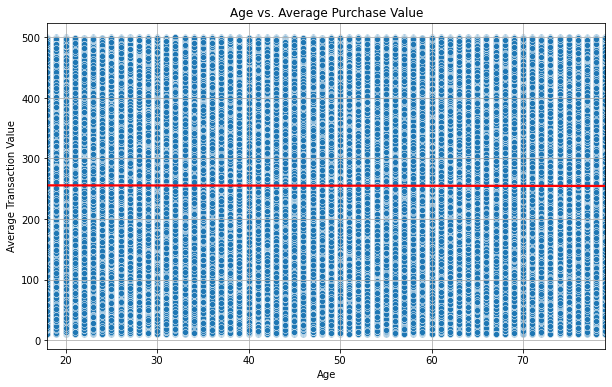

In [48]:
# Age vs. Average Purchase Value
plt.figure(figsize=(10, 6))
sns.scatterplot(x='age', y='avg_transaction_value', data=retail_data)
sns.regplot(x='age', y='avg_transaction_value', data=retail_data, scatter=False, color='red')
plt.title('Age vs. Average Purchase Value')
plt.xlabel('Age')
plt.ylabel('Average Transaction Value')
plt.grid()
plt.show()

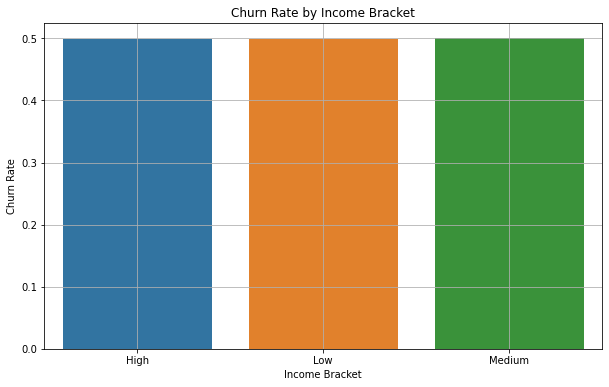

In [50]:
# Calculate churn rate by income bracket
churn_rate = retail_data.groupby('income_bracket')['churned'].value_counts(normalize=True).unstack().fillna(0)
churn_rate['churn_rate'] = churn_rate['Yes']  # Churn rate as a percentage
churn_rate = churn_rate[['churn_rate']]  # Keep only churn rate column
churn_rate.reset_index(inplace=True)

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x='income_bracket', y='churn_rate', data=churn_rate)
plt.title('Churn Rate by Income Bracket')
plt.xlabel('Income Bracket')
plt.ylabel('Churn Rate')
plt.grid()
plt.show()

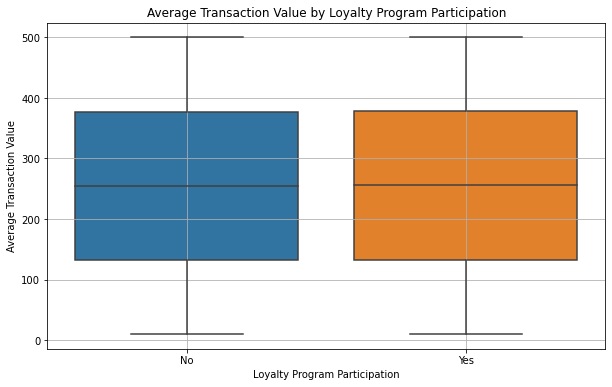

In [51]:

# Loyalty Program vs. Average Transaction Value
plt.figure(figsize=(10, 6))
sns.boxplot(x='loyalty_program', y='avg_transaction_value', data=retail_data)
plt.title('Average Transaction Value by Loyalty Program Participation')
plt.xlabel('Loyalty Program Participation')
plt.ylabel('Average Transaction Value')
plt.grid()
plt.show()


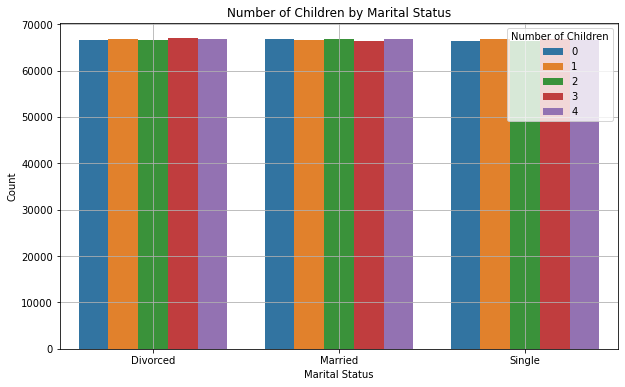

In [52]:

# Marital Status vs. Number of Children
plt.figure(figsize=(10, 6))
sns.countplot(x='marital_status', hue='number_of_children', data=retail_data)
plt.title('Number of Children by Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.legend(title='Number of Children')
plt.grid()
plt.show()


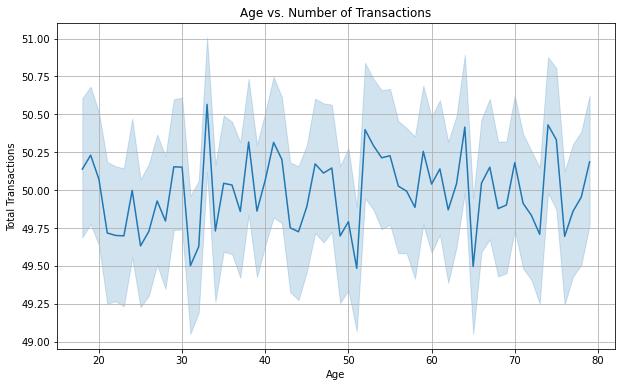

In [53]:

# Age vs. Number of Transactions
plt.figure(figsize=(10, 6))
sns.lineplot(x='age', y='total_transactions', data=retail_data)
plt.title('Age vs. Number of Transactions')
plt.xlabel('Age')
plt.ylabel('Total Transactions')
plt.grid()
plt.show()


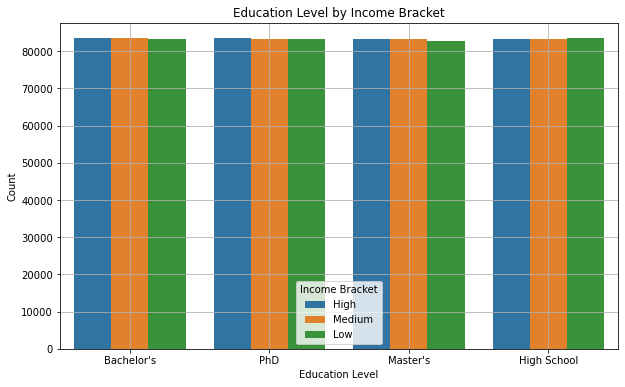

In [54]:

# Education Level vs. Income Bracket
plt.figure(figsize=(10, 6))
sns.countplot(x='education_level', hue='income_bracket', data=retail_data)
plt.title('Education Level by Income Bracket')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.legend(title='Income Bracket')
plt.grid()
plt.show()

# 4. Conclusion
